In [1]:
#Importing the libraries
import os, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import keras
import shutil, glob
from zipfile import ZipFile

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Unzipping the Kaggle Dataset
facial_age_zip_path = "/content/drive/MyDrive/Data/KaggleFacialAge.zip"

with ZipFile(facial_age_zip_path, 'r') as myzip:
    myzip.extractall()
    print('Done unzipping KaggleFacialAge.zip')

Done unzipping KaggleFacialAge.zip


In [4]:
#Creating an array of all the folders name of the dataset
kaggle_faces_path = "../content/KaggleFacialAge"
kaggle_faces_folders = os.listdir(kaggle_faces_path)
kaggle_faces_folders = np.array(kaggle_faces_folders)

In [5]:
#Creating Dictionary Containing Number of Images per Age for Kaggle Dataset
kaggle_images = {}

for folder in kaggle_faces_folders:
    temp_path = os.path.join(kaggle_faces_path, folder)
    n_images = len(os.listdir(temp_path))
    kaggle_images[int(folder)] = n_images 

In [6]:
#Unzipping the UTK Dataset
facial_age_zip_path = "/content/drive/MyDrive/Data/UTKFaces.zip"

with ZipFile(facial_age_zip_path, 'r') as myzip:
    myzip.extractall()
    print('Done unzipping UTKFaces.zip')

Done unzipping UTKFaces.zip


In [7]:
#Creating Dictionary Containing Number of Images per Age for UTK Dataset
utk_images = {}
utk_faces_path = "../content/UTKFaces"
utkface_image_names = os.listdir(utk_faces_path)

def finding_age(image_name):
    image_labels = image_name.split('_')
    age = int(image_labels[0])
    return age

for image in utkface_image_names:
    age = finding_age(image)
    if age not in utk_images:
        utk_images[age] = 1
    else:
        utk_images[age] += 1

#Sorting the dict
utk_images = dict(sorted(utk_images.items(), key=lambda x: x[0]))  

In [8]:
#Merging the Dictionaries 
def mergeDict(dict_1, dict_2):
    merged_dict = {**dict_1, **dict_2}
    for key, value in merged_dict.items():
        if key in dict_1 and key in dict_2:
            merged_dict[key] = dict_1[key] + dict_2[key]
    return merged_dict        

combined_images = mergeDict(kaggle_images , utk_images)
combined_images = dict(sorted(combined_images.items(), key=lambda x: x[0]))  
#CREARE UNA FUNZIONE CHE MOSTRI LE PRIME 10 RIGHE DI UN DIZIONARIO, PER MOSTRARLI TUTTI E 3

In [9]:
#Showing the totoal number of the images
total_img = 0

for k, v in combined_images.items():
    total_img += v
    
total_img

33884

In [11]:
def groups(diz, *age_ranges):
  index = 0
  groups = []
  range = []
  for k, v in diz.items():
      if index + 1 > len(age_ranges) or k <= age_ranges[index]:
          range.append(k)
      else:
          groups.append(range)
          range = [k]
          index += 1
  groups.append(range)

  return groups                     
    
grs = groups(combined_images, 2, 9, 18, 25, 40, 55, 65)  
print(grs)  

[[1, 2], [3, 4, 5, 6, 7, 8, 9], [10, 11, 12, 13, 14, 15, 16, 17, 18], [19, 20, 21, 22, 23, 24, 25], [26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55], [56, 57, 58, 59, 60, 61, 62, 63, 64, 65], [66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 95, 96, 99, 100, 101, 103, 105, 110, 111, 115, 116]]


In [12]:
#Creazione lista contenente le info nel punto 1
#Parlare riguardo class imbalance
res = []

for index, value in enumerate(grs):
    temp = 0
    for num in value:
        temp += combined_images[num]
    res.append([index, str(value[0])+'-'+str(value[-1]), temp, str(round(temp/total_img*100,3)) + '%'])

res

[[0, '1-2', 3400, '10.034%'],
 [1, '3-9', 2880, '8.5%'],
 [2, '10-18', 2616, '7.72%'],
 [3, '19-25', 4026, '11.882%'],
 [4, '26-40', 11204, '33.066%'],
 [5, '41-55', 4520, '13.34%'],
 [6, '56-65', 2495, '7.363%'],
 [7, '66-116', 2743, '8.095%']]

In [13]:
#Trasformare la lista in un dataframe e poi csv
df = pd.DataFrame(res, columns =['Label', 'Age-Range', '#Images', '%Total']) 
#os.makedirs('Stats', exist_ok=True) 
#df.to_csv('Stats/data_stats.csv')
print(df)

   Label Age-Range  #Images   %Total
0      0       1-2     3400  10.034%
1      1       3-9     2880     8.5%
2      2     10-18     2616    7.72%
3      3     19-25     4026  11.882%
4      4     26-40    11204  33.066%
5      5     41-55     4520   13.34%
6      6     56-65     2495   7.363%
7      7    66-116     2743   8.095%


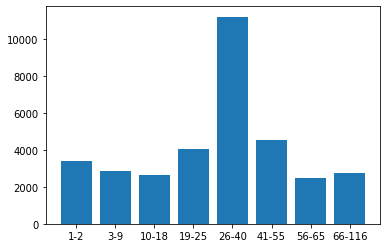

In [14]:
#Fare grafico a barre con le percentuali del totale

# Choose the height of the bars
height = []
bars = []
for elem in res:
    height.append(elem[2])
    bars.append(elem[1])

# Choose the names of the bars
x_pos = np.arange(len(tuple(bars)))

# Create bars
plt.bar(x_pos, height)

# Create names on the x-axis
plt.xticks(x_pos, tuple(bars), color='black')
plt.yticks(color='black')

# Show graphic
plt.show()

In [15]:
#Mettere immagini in un'unica cartella sistemando il nome di ogni immagine

#Creazione della cartella 
comb_path = "../content/Combined_Images_NEWRANGE"
if not os.path.exists(comb_path):
    os.makedirs(comb_path)

#Copiare le immagini del dataset UTK
src_dir = utk_faces_path
counter = 0
print('--- Copying UTK dataset images into combined images folder ---\n')
for jpgfile in glob.iglob(os.path.join(src_dir, "*.jpg")):
    shutil.copy(jpgfile, comb_path)
    counter += 1
    if counter % 3000 == 0:
        print('Images copied to combined images folder = {} of 33884'.format(counter))

--- Copying UTK dataset images into combined images folder ---

Images copied to combined images folder = 3000 of 33884
Images copied to combined images folder = 6000 of 33884
Images copied to combined images folder = 9000 of 33884
Images copied to combined images folder = 12000 of 33884
Images copied to combined images folder = 15000 of 33884
Images copied to combined images folder = 18000 of 33884
Images copied to combined images folder = 21000 of 33884
Images copied to combined images folder = 24000 of 33884


In [16]:
#Sistemare e copiare le immagini del dateset Kaggle

src_dir = kaggle_faces_path
print('--- Copying Kaggle dataset images into combined images folder ---\n')
for folder in os.listdir(kaggle_faces_path):
    for pngfile in glob.iglob(os.path.join(src_dir + '/' + folder, "*.png")):
        pngfile_id = pngfile.split("/")[-1]
        destpath = comb_path + '/' + str(int(folder)) + '_' + pngfile_id[:-4] + '.jpg'

        # Loading .png image
        png_img = cv2.imread(pngfile)
        png_img = cv2.resize(png_img, dsize=(50, 50))
        
        # converting to jpg file
        #saving the jpg file
        cv2.imwrite(destpath, png_img, [int(cv2.IMWRITE_JPEG_QUALITY), 100])
        
        counter += 1
        if counter % 3000 == 0:
            print('Images copied to combined images folder = {} of 33884'.format(counter))
        
print('Images copied to combined images folder = {} of 33884'.format(counter))

--- Copying Kaggle dataset images into combined images folder ---

Images copied to combined images folder = 27000 of 33884
Images copied to combined images folder = 30000 of 33884
Images copied to combined images folder = 33000 of 33884
Images copied to combined images folder = 33884 of 33884


In [17]:
#Costruisco un dataframe con nome file, età e label
def label_map(age):
    age = int(age)
    if age >=1 and age <=2:
        return 0
    elif age >=3 and age <=9:
        return 1
    elif age >=10 and age <=18:
        return 2
    elif age >=19 and age <=25:
        return 3
    elif age >=26 and age <=40:
        return 4
    elif age >=41 and age <=55:
        return 5
    elif age >=56 and age <=65:
        return 6
    elif age >=66 and age <=116:
        return 7
    else:
        return 'Age out of bound!'

res = []
for image in os.listdir(comb_path):
    age = int(image.split('_')[0])
    label = label_map(age)
    res.append([image, age, label])
    
#Trasformare la lista in un dataframe e poi csv e salvarlo
df = pd.DataFrame(res, columns =['FileName', 'Age', 'Label'])  
#df.to_csv('Stats/filenames_label.csv')
print(df)  

                           FileName  Age  Label
0                        2_7508.jpg    2      0
1      59_0_0_20170108235700268.jpg   59      6
2       5_0_0_20170110215925587.jpg    5      1
3      75_0_2_20170113174659450.jpg   75      7
4      26_1_2_20170116183016628.jpg   26      4
...                             ...  ...    ...
33879                    1_7928.jpg    1      0
33880                   14_7654.jpg   14      2
33881                   33_5182.jpg   33      4
33882                   57_2020.jpg   57      6
33883  21_1_3_20170104222111271.jpg   21      3

[33884 rows x 3 columns]


In [18]:
#Controllo se il numero di immagini per label coincide
df['Label'].value_counts().sort_index()

0     3400
1     2880
2     2616
3     4026
4    11204
5     4520
6     2495
7     2743
Name: Label, dtype: int64

In [19]:
#Funzione per ottenere la label dal nome

def get_label(filename):
    age = filename.split('_')[0]
    return str(label_map(age))

In [20]:
#Creo delle sottocartelle divise per label per poi utilizzare la funzione di tensorflow che 
#recupera la label associata all'immagine dal nome della sottocartella

for image in os.listdir(comb_path):
    if not os.path.exists(os.path.join(comb_path, get_label(image))):      
        os.makedirs(os.path.join(comb_path,get_label(image)))  
    shutil.move(os.path.join(comb_path,image),os.path.join(comb_path, get_label(image),image))

In [21]:
#Creo la cartella Combined_Images.zip e la inserisco sul Google Drive
output_filename = '../content/drive/MyDrive/Data/Combined_Images_NEWRANGE'
shutil.make_archive(output_filename, 'zip', comb_path)

'/content/drive/MyDrive/Data/Combined_Images_NEWRANGE.zip'